In [3]:
import json 
import numpy as np 
import pandas as pd 

In [4]:
pwd

'/app/timeseries/multiclass_src/notebooks'

# 1. Batch Size 128 

In [5]:
def load_eval_json(eval_file): 
    results_path = "/app/timeseries/multiclass_src/results/wine"
    output_file = eval_file
    fp = "/".join([results_path, output_file])
    with open(fp, "r+") as f: 
        results = json.load(f)
    return results 

In [6]:
af1_results = load_eval_json(eval_file="256_f1_results.json")
ce_results = load_eval_json(eval_file="256_ce_results.json")

In [7]:
def aggregate_runs(results_json): 
    '''Assuming each input is an array of JSONs that all have the same shape
    This aggregates an array of jsons together into a singular one, based on the set fields below
    '''
    eval_json = {}
    eval_taus = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5', '0.55', '0.6', '0.7', '0.8', '0.9']
    for tau in eval_taus: 
        eval_json[str(tau)] = {}
        eval_json[str(tau)]['mean_f1'] =  np.mean([x[str(tau)]['mean_f1'] for x in results_json])
        class_f1s = [x[str(tau)]['class_f1s'] for x in results_json]
        eval_json[str(tau)]['class_f1s'] = np.mean(class_f1s, axis=0)
        
        class_pr = [x[str(tau)]['class_precisions'] for x in results_json]
        eval_json[str(tau)]['class_precisions'] = np.mean(class_pr, axis=0)
        eval_json[str(tau)]['mean_pr'] = np.mean(eval_json[str(tau)]['class_precisions'])
        
        class_re = [x[str(tau)]['class_recalls'] for x in results_json]
        eval_json[str(tau)]['class_recalls'] = np.mean(class_re, axis=0)
        eval_json[str(tau)]['mean_re'] = np.mean(eval_json[str(tau)]['class_recalls'])
    return eval_json 

In [8]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [9]:
af1_agg

{'0.1': {'mean_f1': 0.5473251581192017,
  'class_f1s': array([0.21282865, 0.62387825, 0.69044689, 0.66214683]),
  'class_precisions': array([0.14161943, 0.59106821, 0.69325908, 0.64407189]),
  'mean_pr': 0.5175046533346177,
  'class_recalls': array([0.45      , 0.66086959, 0.68780489, 0.68214284]),
  'mean_re': 0.6202043294906616},
 '0.2': {'mean_f1': 0.4880099296569824,
  'class_f1s': array([0.09898988, 0.66725826, 0.64216059, 0.54363098]),
  'class_precisions': array([0.06885965, 0.66699322, 0.59970367, 0.63041024]),
  'mean_pr': 0.4914916966110468,
  'class_recalls': array([0.20000001, 0.66842104, 0.69137931, 0.47868852]),
  'mean_re': 0.5096222192049027},
 '0.3': {'mean_f1': 0.589604663848877,
  'class_f1s': array([0.43484653, 0.65756176, 0.70056386, 0.56544657]),
  'class_precisions': array([0.42103175, 0.6454335 , 0.69387475, 0.57129626]),
  'mean_pr': 0.5829090654850007,
  'class_recalls': array([0.51428573, 0.67123287, 0.7078125 , 0.5625    ]),
  'mean_re': 0.6139577746391296},

In [10]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
af1_pr = [af1_agg[x]['mean_pr'] for x in af1_agg]
af1_re = [af1_agg[x]['mean_re'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]
ce_pr = [ce_agg[x]['mean_pr'] for x in ce_agg]
ce_re = [ce_agg[x]['mean_re'] for x in ce_agg]

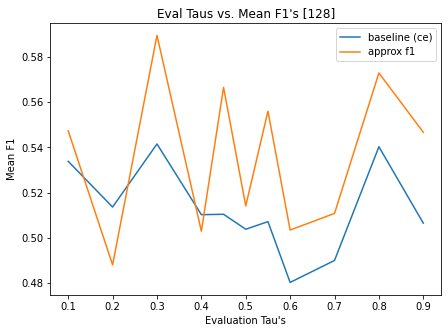

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("Eval Taus vs. Mean F1's [128]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

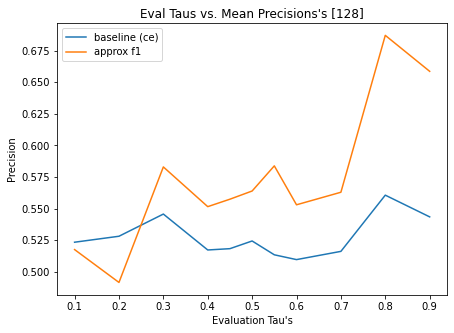

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_pr, label="baseline (ce)")
plt.plot(taus, af1_pr, label="approx f1")
plt.title("Eval Taus vs. Mean Precisions's [128]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Precision")
plt.legend()
plt.show()

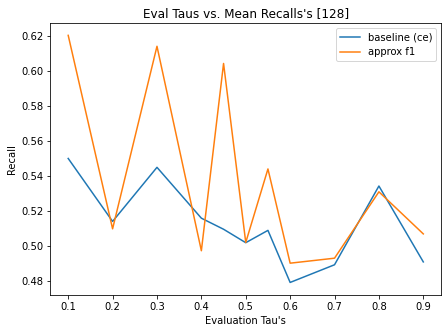

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_re, label="baseline (ce)")
plt.plot(taus, af1_re, label="approx f1")
plt.title("Eval Taus vs. Mean Recalls's [128]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Recall")
plt.legend()
plt.show()

# 2. Batch Size 256 

In [14]:
af1_results = load_eval_json(eval_file="512_f1_results.json")
ce_results = load_eval_json(eval_file="512_ce_results.json")

In [15]:
af1_agg = aggregate_runs(af1_results)
ce_agg = aggregate_runs(ce_results)

In [17]:
af1_f1s = [af1_agg[x]['mean_f1'] for x in af1_agg]
af1_pr = [af1_agg[x]['mean_pr'] for x in af1_agg]
af1_re = [af1_agg[x]['mean_re'] for x in af1_agg]
ce_f1s = [ce_agg[x]['mean_f1'] for x in ce_agg]
ce_pr = [ce_agg[x]['mean_pr'] for x in ce_agg]
ce_re = [ce_agg[x]['mean_re'] for x in ce_agg]

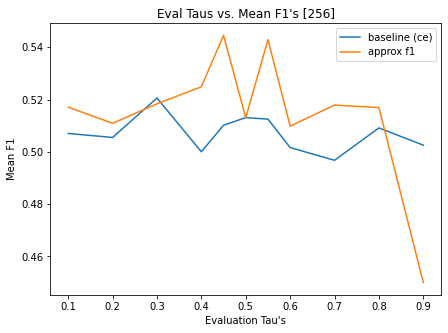

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_f1s, label="baseline (ce)")
plt.plot(taus, af1_f1s, label="approx f1")
plt.title("Eval Taus vs. Mean F1's [256]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Mean F1")
plt.legend()
plt.show()

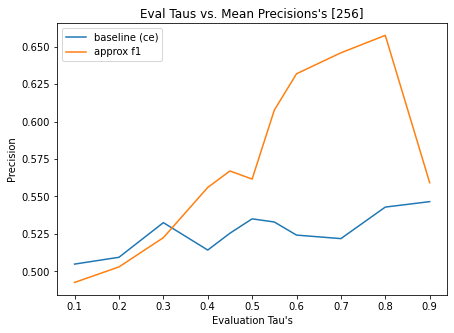

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_pr, label="baseline (ce)")
plt.plot(taus, af1_pr, label="approx f1")
plt.title("Eval Taus vs. Mean Precisions's [256]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Precision")
plt.legend()
plt.show()

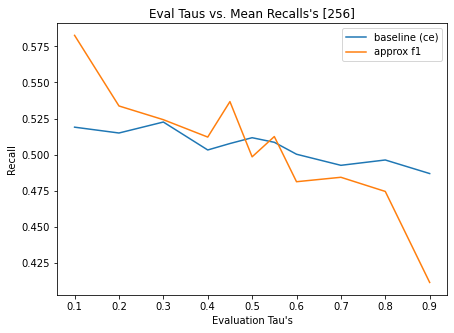

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
# plot the mean f1's across the taus 
taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
plt.plot(taus, ce_re, label="baseline (ce)")
plt.plot(taus, af1_re, label="approx f1")
plt.title("Eval Taus vs. Mean Recalls's [256]")
plt.xlabel("Evaluation Tau's")
plt.ylabel("Recall")
plt.legend()
plt.show()